# ML_Engineer_Case_Study_Diabetes

## Questions:
We are interested in understanding what are the main contributing factors toward diabetes. We have been given a patient-level dataset based on patient responses to a questionare (<b>Diabetes Data</b>) that measures key demographic and health outcomes for a given patient. This dataset has been flagged for the following: 0: is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes in the target column <b>DiabetesClassification</b>.We have also been provided a data dictionary (<b>Diabetes Data Dictionary</b>).


### Part 1: AI/ML

#### 1a. Conduct exploratory data analysis, what are your findings for the diferent populations?
#### 1b. Are there any particular tests you would perform to address bias, showcase your results
#### 2a. Create ML model(s) to predict who is more likely to have diabetes (target variable: DiabetesClassification);   what are the top predictors of diabetes and are there any trends that you see within the dataset?
#### 2b. Explain your reasoning for choosing your model(s)
#### 2c. Conduct an analysis of your model(s)' performance



## 1a. Conduct exploratory data analysis, what are your findings for the different populations?

## 1b. Are there any particular tests you would perform to address bias, showcase your results

### Import Libraries and read the data

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msng

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics, preprocessing

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport
from ydata_profiling.model.summarizer import BaseSummarizer

import sweetviz as sv
import math
import warnings
warnings.filterwarnings('ignore')

# Read the data
df = pd.read_csv('data.csv')

### Check shape, datatype and view a sample of the data

In [5]:
# Dataset shape
df.shape

(253680, 22)

In [6]:
# Let's view the data 
df.head()

DiabetesClassification  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                       0       1         1          1   40       1       0   
1                       0       0         0          0   25       1       0   
2                       0       1         1          1   28       0       0   
3                       0       1         0          1   27       0       0   
4                       0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4   
1            1        3         0         0         0    0    7          6   
2            1        5        30        30         1    0    9          4   
3            0        2         0         0         0    0   11          3   
4            0        2         3         0         0    0   11          5   

   Income  
0       2  
1       1  
2       5  
3       4  
4       2  

[5 rows x 22 columns]

In [57]:
# Understand the data types
df.dtypes

DiabetesClassification    int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                       int64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object

| Variable                | Type         | Description                                                                                                                                                                                                                                                                                                                                                       |
|-------------------------|--------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| DiabetesClassification  | Categorical  | The diabetes status of an individual; 0 = no diabetes, 1 = prediabetes, 2 = diabetes.                                                                                                                                                                                                                                                                             |
| HighBP                  | Binary       | High blood pressure status; 0 = no high BP, 1 = high BP.                                                                                                                                                                                                                                                                                                         |
| HighChol                | Binary       | High cholesterol status; 0 = no high cholesterol, 1 = high cholesterol.                                                                                                                                                                                                                                                                                           |
| CholCheck               | Binary       | Cholesterol check status; 0 = no cholesterol check in 5 years, 1 = yes, cholesterol check in 5 years.                                                                                                                                                                                                                                                             |
| BMI                     | Continuous   | Body mass index; typically on scale 19-54.                                                                                                                                                                                                                                                                                                                        |
| Smoker                  | Binary       | Smoking status; 0 = no (have not smoked at least 100 cigarettes in their entire life), 1 = yes (have smoked at least 100 cigarettes in their entire life).                                                                                                                                                                                                         |
| Stroke                  | Binary       | Stroke status; 0 = no, 1 = yes (ever told they had a stroke).                                                                                                                                                                                                                                                                                                     |
| HeartDiseaseorAttack    | Binary       | Coronary heart disease (CHD) or myocardial infarction (MI) status; 0 = no, 1 = yes.                                                                                                                                                                                                                                                                               |
| PhysActivity            | Binary       | Physical activity in past 30 days (not including job); 0 = no, 1 = yes.                                                                                                                                                                                                                                                                                           |
| Fruits                  | Binary       | Consume fruit 1 or more times per day; 0 = no, 1 = yes.                                                                                                                                                                                                                                                                                                          |
| Veggies                 | Binary       | Consume vegetables 1 or more times per day; 0 = no, 1 = yes.                                                                                                                                                                                                                                                                                                      |
| HvyAlcoholConsump       | Binary       | Heavy alcohol consumption; 0 = no, 1 = yes (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).                                                                                                                                                                                                                    |
| AnyHealthcare           | Binary       | Health care coverage status; 0 = no, 1 = yes (any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.).                                                                                                                                                                                                                     |
| NoDocbcCost             | Binary       | Inability to see a doctor due to cost; 0 = no, 1 = yes (needed to see a doctor in the past 12 months but could not because of cost).                                                                                                                                                                                                                               |
| GenHlth                 | Ordinal      | General health status; scale 1-5; 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor.                                                                                                                                                                                                                                                                     |
| MentHlth                | Continuous   | Number of days in the past 30 days when mental health was not good; scale 1-30 days.                                                                                                                                                                                                                                                                              |
| PhysHlth                | Continuous   | Number of days in the past 30 days when physical health was not good; scale 1-30 days.                                                                                                                                                                                                                                                                            |
| DiffWalk                | Binary       | Difficulty in walking or climbing stairs; 0 = no, 1 = yes (serious difficulty).                                                                                                                                                                                                                                                                                   |
| Sex                     | Binary       | Gender; 0 = female, 

The mean may give an idea of the central tendency of the distribution while the std measures the spread of the data points around the mean.

In [11]:
df.describe()

DiabetesClassification         HighBP       HighChol      CholCheck  \
count           253680.000000  253680.000000  253680.000000  253680.000000   
mean                 0.296921       0.429001       0.424121       0.962670   
std                  0.698160       0.494934       0.494210       0.189571   
min                  0.000000       0.000000       0.000000       0.000000   
25%                  0.000000       0.000000       0.000000       1.000000   
50%                  0.000000       0.000000       0.000000       1.000000   
75%                  0.000000       1.000000       1.000000       1.000000   
max                  2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       3.884425  
std         0.496429       3.054220       0.985774       1.396828  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       3.000000  
50%         0.000000       8.000000       5.000000       5.000000  
75%         1.000000      10.000000       6.000000       5.000000  
max         1.000000      13.000000       6.000000       5.000000  

[8 rows x 22 columns]

### Check for missing values
There are no missing values in the dataset

Missing values can introduce bias into the analysis, can lead to errors in modeling and can affect the quality of results.

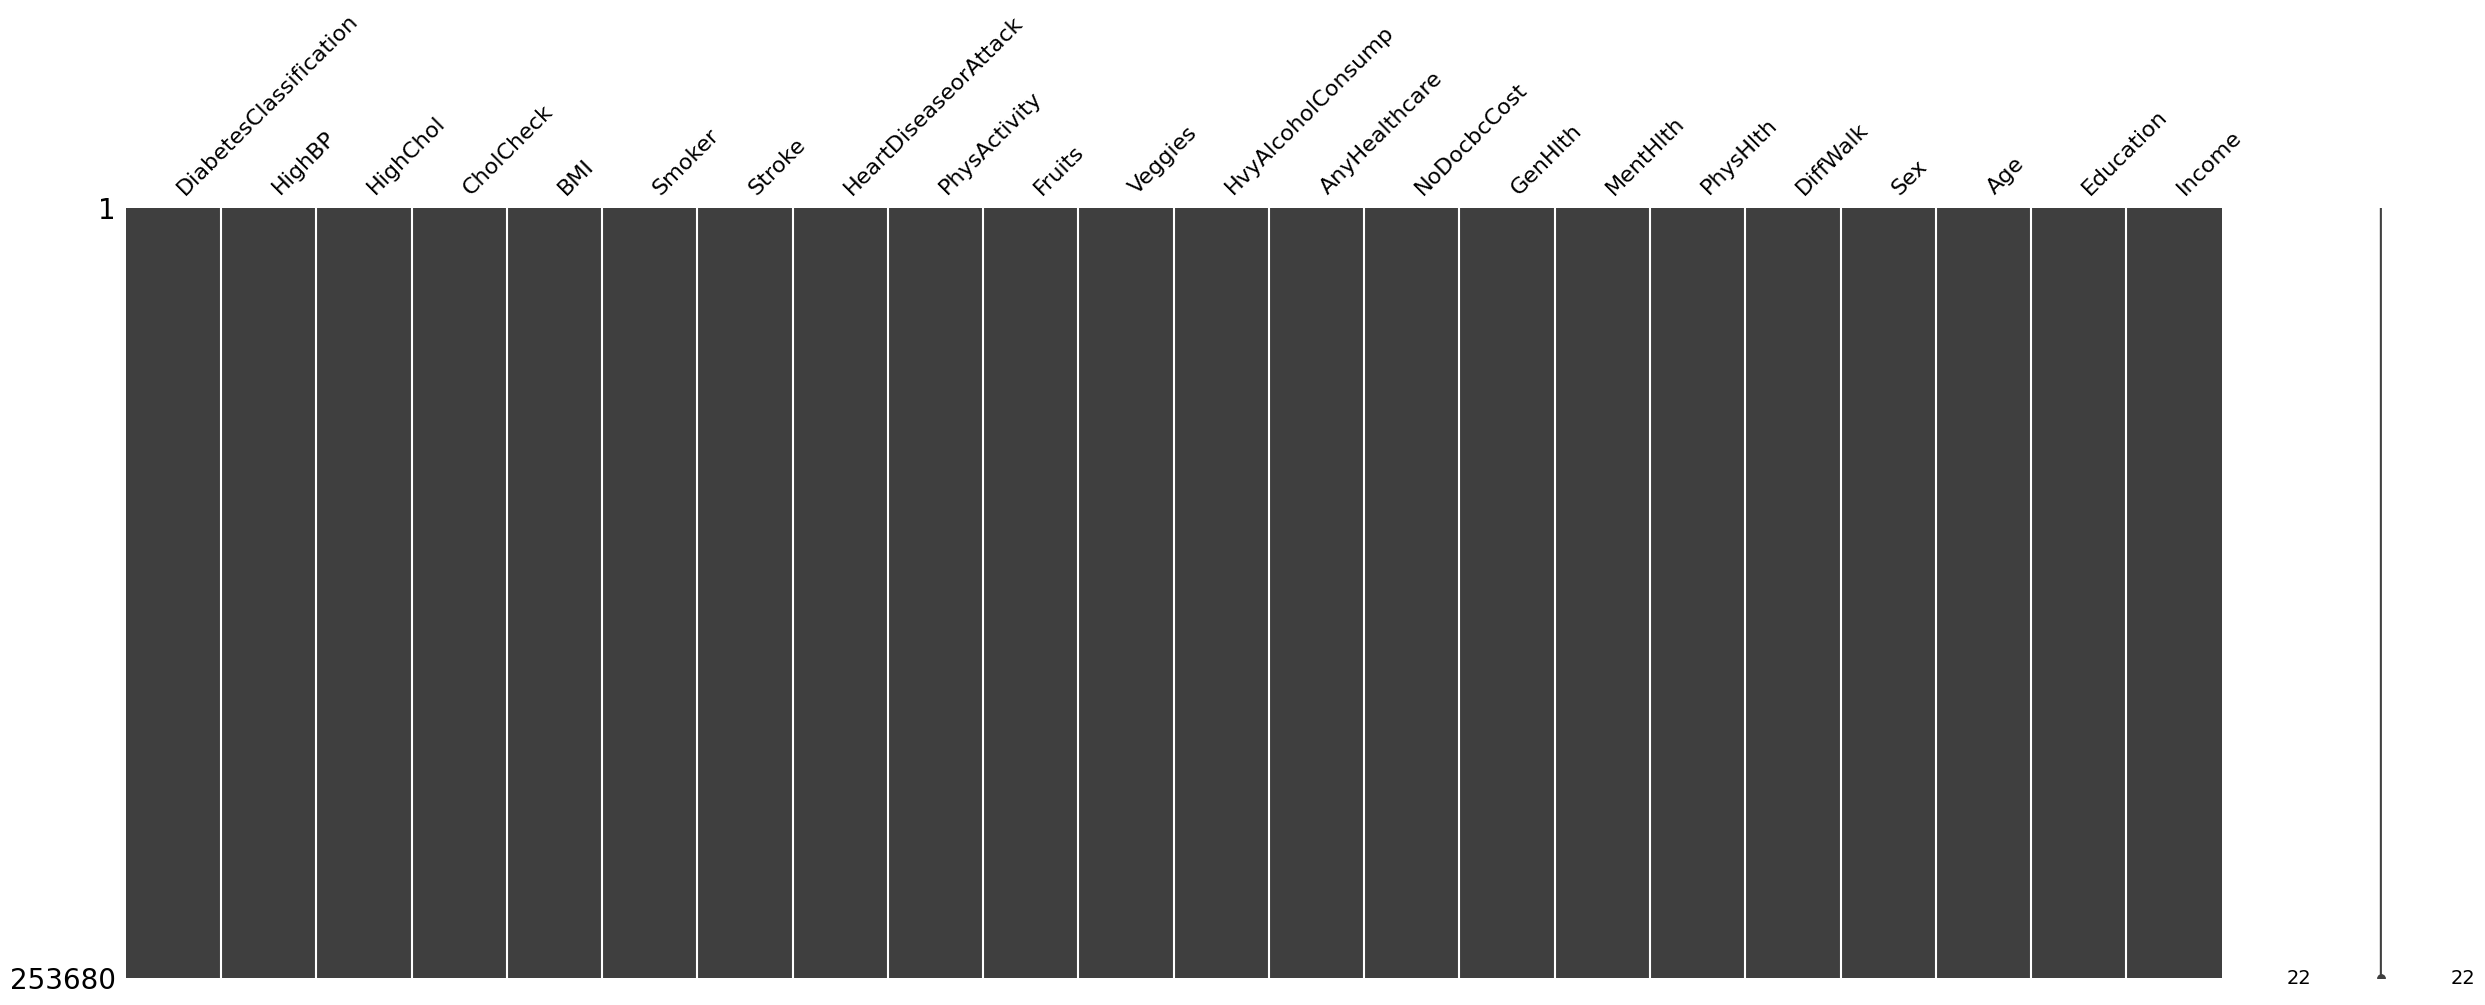

In [12]:
msng.matrix(df, figsize = (30,10))
plt.show()

### Dublicates

Removing duplicates can improve data quality, consistency, and uniqueness, which can lead to more accurate and reliable results.

In [14]:
num_duplicates = df.duplicated().sum()
print ("There are {} dublicates".format(num_duplicates))
df = df.drop_duplicates()
num_duplicates = df.duplicated().sum()
print ("There are {} dublicates".format(num_duplicates))

There are 29319 dublicates
There are 0 dublicates


### Correlation heatmap

To avoid potential biases, because the three groups of the Diabetes variables have different sizes it is better to create two separate correlation maps.

#### Diabetes Correlation

- Diabetes has a moderate positive correlation with GenHlth (0.28), indicating that as the general health status worsens, the likelihood of having diabetes increases.
- HighBP (high blood pressure) and HighChol (high cholesterol) also have moderate positive correlations with DiabetesClassification (0.25 and 0.2, respectively), suggesting that individuals with high blood pressure or high cholesterol are more likely to have diabetes.
- Age shows a positive correlation with DiabetesClassification (0.18), indicating that older individuals are more likely to have diabetes.
- Income and Education show negative correlations with DiabetesClassification (-0.13 and -0.1, respectively), implying that individuals with higher income and education levels are less likely to have diabetes.


#### PreDiabetes Correlation

- PreDiabetes has a weak positive correlation with HighBP (High Blood Pressure) and HighChol (High Cholesterol) (both 0.07). The same for BMI (Body Mass Index), (General Health) etc.

#### Other Notable Correlations

- HighBP (High Blood Pressure) and Age: ~ 0.3, indicating a moderate positive correlation. As age increases, the likelihood of having high blood pressure also increases.
- HighBP and HighChol (High Cholesterol): ~ 0.3, indicating a positive correlation. People with high blood pressure are also more likely to have high cholesterol.
- GenHlth (General Health) and PhysHlth (Physical Health): 0.490474, indicating a moderate positive correlation. Better general health is associated with better physical health.
- DiffWalk (Difficulty Walking) and PhysHlth: ~0.5, indicating a moderate positive correlation. People with better physical health tend to have less difficulty walking.
- Education and Income: 0.4, indicating a moderate positive correlation. Higher education levels are associated with higher income.

<b> There are also some negative correlations:

- PhysActivity (Physical Activity) and GenHlth ~ -0.213629, indicating a negative correlation. It is surprising to see a negative correlation here, as we would generally expect a higher level of physical activity to be associated with better general health. This could be due to other factors not considered in the data or the way the variables are measured.  
- PhysActivity and DiffWalk indicating a negative correlation. Higher levels of physical activity are associated with less difficulty walking.
- Education and GenHlth: -0.223973, indicating a negative correlation. This is another unexpected result, as higher education levels are usually associated with better health outcomes. Again, this could be due to other factors not considered in the data or the way the variables are measured.

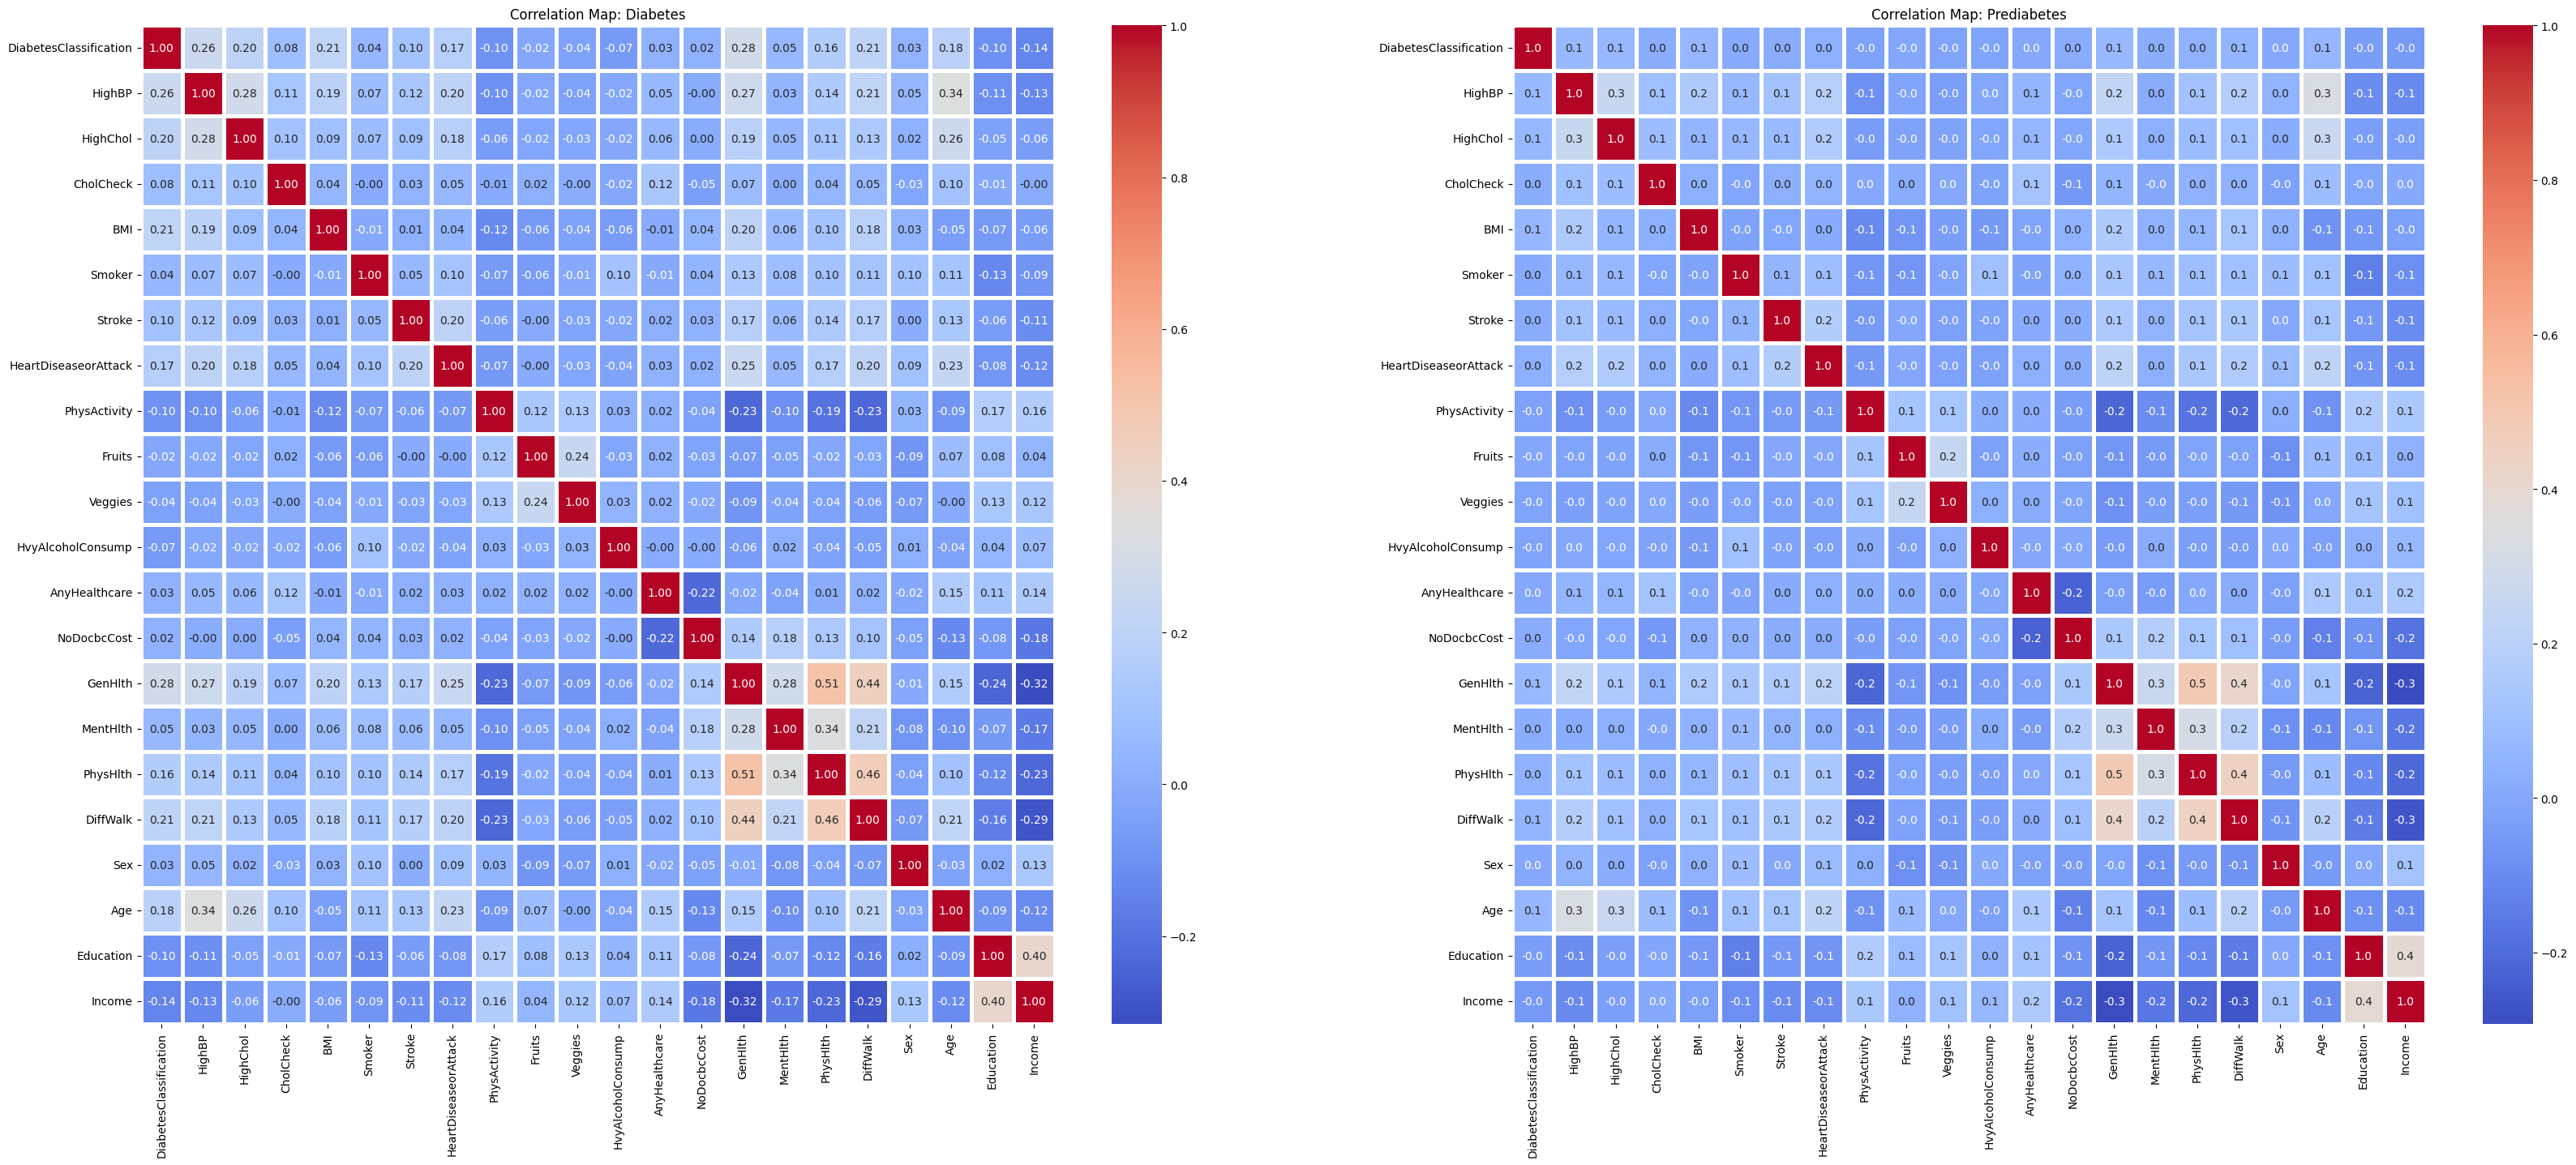

In [40]:
# Filter the dataset based on DiabetesClassification
no_diabetes_df = df[df['DiabetesClassification'] == 0]
prediabetes_df = df[df['DiabetesClassification'] == 1]
diabetes_df = df[df['DiabetesClassification'] == 2]

# Combine No Diabetes and Diabetes data
no_diabetes_and_diabetes_df = pd.concat([no_diabetes_df, diabetes_df])

# Combine No Diabetes and Prediabetes data
no_diabetes_and_prediabetes_df = pd.concat([no_diabetes_df, prediabetes_df])

# Compute the correlation matrices
no_diabetes_and_diabetes_corr = no_diabetes_and_diabetes_df.corr()
no_diabetes_and_prediabetes_corr = no_diabetes_and_prediabetes_df.corr()

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 16))

# Plot the correlation maps
sns.heatmap(no_diabetes_and_diabetes_corr, annot=True, fmt='.2f', linewidths=2.5, cmap='coolwarm', ax=ax1)
sns.heatmap(no_diabetes_and_prediabetes_corr, annot=True, fmt='.1f', linewidths=2.5, cmap='coolwarm', ax=ax2)

# Set titles for the subplots
ax1.set_title('Correlation Map: Diabetes')
ax2.set_title('Correlation Map: Prediabetes')

# Display the plots
plt.show()

### Examine each feature separately and determine which ones to include in our initial models. 
We may need to preprocess some features more extensively than others before using them.

<b>Create a fresh copy of the data and use it for visuzalization and experimental purposes</b>

In [15]:
df_copy = df.copy()
df_copy['DiabetesClassification'] = df['DiabetesClassification'].map({0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'})
df_copy['HighBP'] = df['HighBP'].map({0: 'No High', 1: 'High BP'})
df_copy['HighChol'] = df['HighChol'].map({0: 'No High Cholesterol', 1: 'High Cholesterol'})
df_copy['CholCheck'] = df['CholCheck'].map({0: 'No Cholesterol Check in 5 Years', 1: 'Cholesterol Check in 5 Years'})
df_copy['Smoker'] = df['Smoker'].map({0: 'No', 1: 'Yes'})
df_copy['Stroke'] = df['Stroke'].map({0: 'No', 1: 'Yes'})
df_copy['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].map({0: 'No', 1: 'Yes'})
df_copy['PhysActivity'] = df['PhysActivity'].map({0: 'No', 1: 'Yes'})
df_copy['Fruits'] = df['Fruits'].map({0: 'No', 1: 'Yes'})
df_copy['Veggies'] = df['Veggies'].map({0: 'No', 1: 'Yes'})
df_copy['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].map({0: 'No', 1: 'Yes'})
df_copy['AnyHealthcare'] = df['AnyHealthcare'].map({0: 'No', 1: 'Yes', 2: 'diabetes'})
df_copy['NoDocbcCost'] = df['NoDocbcCost'].map({0: 'No', 1: 'Yes', 2: 'diabetes'})

df_copy['GenHlth'] = df['GenHlth'].map({1: 'Excellent', 2: 'Very Good' , 3: 'Good', 4: 'Fair', 5: 'Poor'})

df_copy['DiffWalk'] = df['DiffWalk'].map({0: 'No', 1: 'Yes'})
df_copy['Sex'] = df['Sex'].map({0: 'Female', 1: 'Male'})

df_copy['Education'] = df['Education'].map({1: 'Never Attended School', 2: 'Elementary' , 3: 'Some high school', 4: 'High school graduate', 5: 'Some college or technical school', 6: 'College graduate'})
df_copy['Income'] = df['Income'].map({1: 'Less Than $15,000', 2: 'Less Than $25,000' , 3: 'Less Than $35,000', 4: 'Less Than $50,000', 5: '$50,000 or More'})
df_copy.head()

DiabetesClassification   HighBP             HighChol  \
0            No Diabetes  High BP     High Cholesterol   
1            No Diabetes  No High  No High Cholesterol   
2            No Diabetes  High BP     High Cholesterol   
3            No Diabetes  High BP  No High Cholesterol   
4            No Diabetes  High BP     High Cholesterol   

                         CholCheck  BMI Smoker Stroke HeartDiseaseorAttack  \
0     Cholesterol Check in 5 Years   40    Yes     No                   No   
1  No Cholesterol Check in 5 Years   25    Yes     No                   No   
2     Cholesterol Check in 5 Years   28     No     No                   No   
3     Cholesterol Check in 5 Years   27     No     No                   No   
4     Cholesterol Check in 5 Years   24     No     No                   No   

  PhysActivity Fruits  ... AnyHealthcare NoDocbcCost    GenHlth MentHlth  \
0           No     No  ...           Yes          No       Poor       18   
1          Yes     No  ...            No         Yes       Good        0   
2           No    Yes  ...           Yes         Yes       Poor       30   
3          Yes    Yes  ...           Yes          No  Very Good        0   
4          Yes    Yes  ...           Yes          No  Very Good        3   

  PhysHlth  DiffWalk     Sex Age                         Education  \
0       15       Yes  Female   9              High school graduate   
1        0        No  Female   7                  College graduate   
2       30       Yes  Female   9              High school graduate   
3        0        No  Female  11                  Some high school   
4        0        No  Female  11  Some college or technical school   

              Income  
0  Less Than $25,000  
1  Less Than $15,000  
2    $50,000 or More  
3  Less Than $50,000  
4  Less Than $25,000  

[5 rows x 22 columns]

### Target Feature: DiabetesClassification

This feature indicates the patient's diabetes status, which can be categorized as either no diabetes, prediabetes, or diabetes. This is the variable that the machine learning model should predict based off all the others.


Key: 0 = no diabetes, 1 = prediabetes, 2 = diabetes


<AxesSubplot: ylabel='DiabetesClassification'>

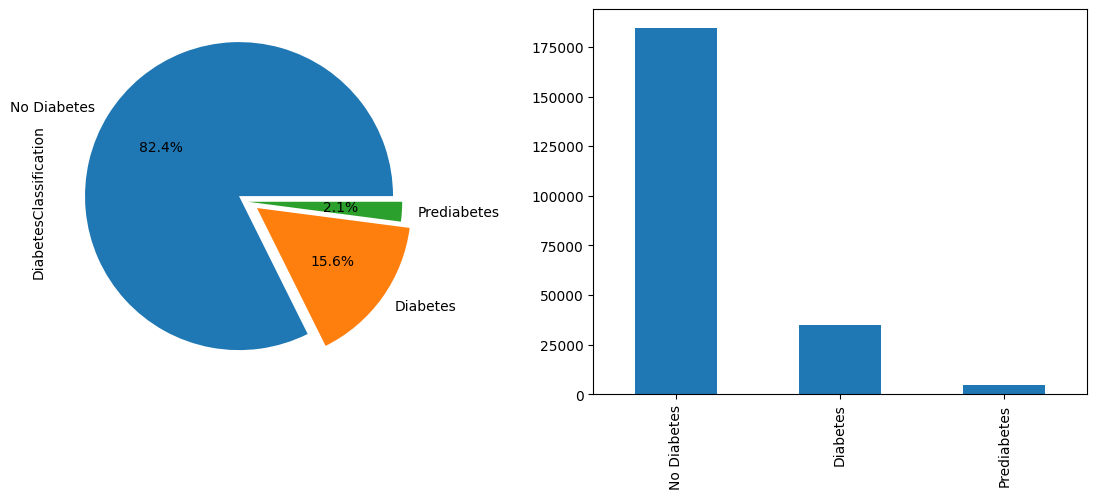

In [18]:
fig1, ax1 = plt.subplots(1,2,figsize=(14,5))
df_copy['DiabetesClassification'].value_counts().plot.bar(ax=ax1[1])
df_copy['DiabetesClassification'].value_counts().plot.pie(explode = (0.07, 0.07, 0), autopct='%.1f%%', ax=ax1[0])

<b>  Target Class DiabetesClassification is highly imbalanced! </b>

In [86]:
noDiabetes = len(df[df.DiabetesClassification == 0])
preDiabetes = len(df[df.DiabetesClassification == 1])
diabetes = len(df[df.DiabetesClassification == 2])
print("Percentage no Diabetes: {:.2f}% or {}/{} persons".format((noDiabetes / (len(df.DiabetesClassification))*100), noDiabetes,len(df.DiabetesClassification)))
print("Percentage Preiabetes: {:.2f}% or {}/{} persons".format((preDiabetes / (len(df.DiabetesClassification))*100), preDiabetes, len(df.DiabetesClassification)))
print("Percentage Diabetes: {:.2f}% or {}/{} persons".format((diabetes / (len(df.DiabetesClassification))*100),diabetes,len(df.DiabetesClassification)))

Percentage no Diabetes: 82.35% or 184765/224361 persons
Percentage Preiabetes: 2.06% or 4624/224361 persons
Percentage Diabetes: 15.59% or 34972/224361 persons


Let's visualize the correlation between the target variable and rest parameters

- Fruits, AnyHealthcare, NoDocbcCost and Sex have <b>not</b> a significant correlation with Diabetes  while HighBP, GenHlth, BMI, HighChol and Age has a significant correlation. </b>

- Similarly, Fruits, AnyHealthcare and Sex have <b>not</b> a significant correlation with PreDiabetes  while HighBP, HighChol GenHlth, BMI and Age has a significant correlation. </b>

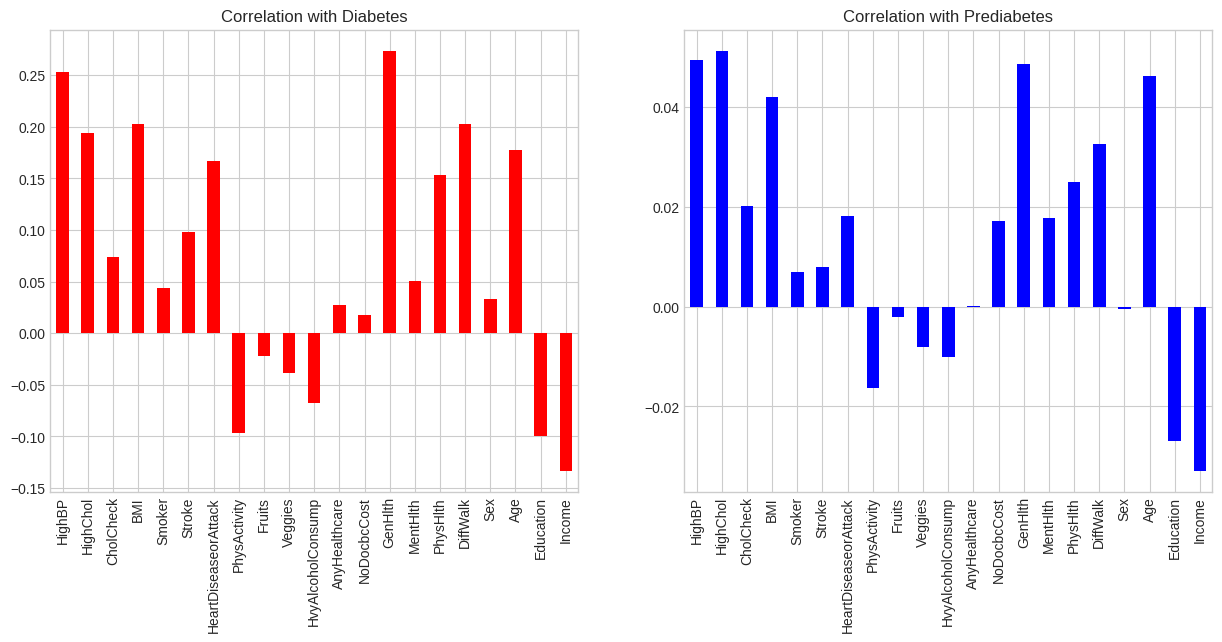

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df.drop('DiabetesClassification', axis=1).corrwith(df.DiabetesClassification==2).plot(
    kind='bar', grid=True, ax=axs[0], title="Correlation with Diabetes", color="red"
)

df.drop('DiabetesClassification', axis=1).corrwith(df.DiabetesClassification==1).plot(
    kind='bar', grid=True, ax=axs[1], title="Correlation with Prediabetes", color="blue"
)
plt.show()

### General Health

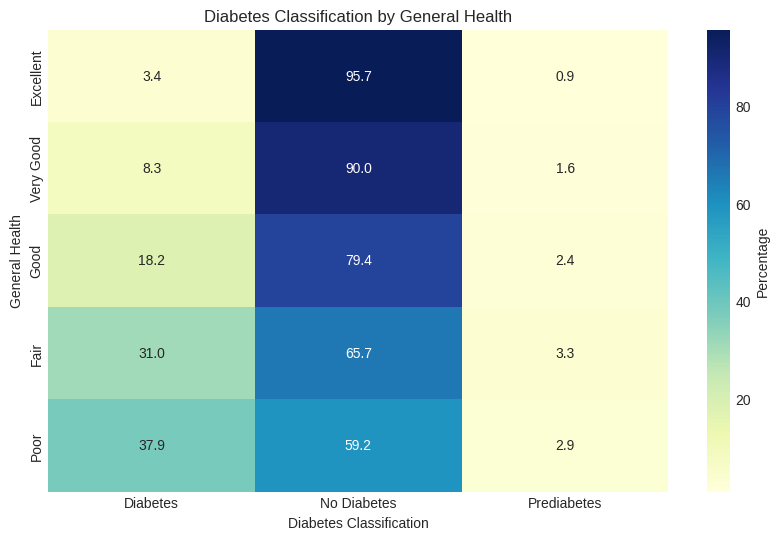

In [90]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['GenHlth'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the GenHlth index
crosstab_normalized = crosstab_normalized.reindex(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('General Health')
ax.set_title('Diabetes Classification by General Health')

# Display the plot
plt.show()

- As the general health improves from 'Poor' to 'Excellent', the frequency of diabetes decreases.

- The prevalence of 'Prediabetes' is relatively low across all general health categories. However, it follows a similar trend to diabetes, with a higher percentage in 'Poor' (2.9%) and 'Fair' (3.3%) categories, and lower percentages in 'Good' (2.4%), 'Very Good' (1.6%), and 'Excellent' (0.9%) categories.


<i>Index normalization it means that the values in each row are divided by the sum of the values in that row

### BMI

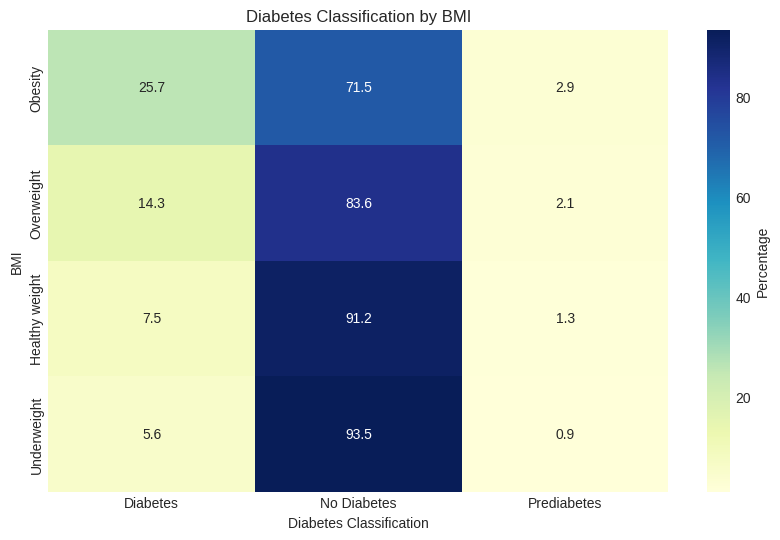

In [91]:
BMI = pd.cut(
    x=df['BMI'], 
    bins=[0,18.5,25,30,80], 
    labels=['Underweight','Healthy weight','Overweight','Obesity'] 
)

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(BMI, df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the BMI index
crosstab_normalized = crosstab_normalized.reindex(['Obesity', 'Overweight', 'Healthy weight', 'Underweight'])

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('BMI')
ax.set_title('Diabetes Classification by BMI')

# Display the plot
plt.show()


- The occurrence of diabetes increases as the BMI category changes from 'Underweight' to 'Obesity'. This is evident by the increase in the percentage of diabetes cases from 5.6% in the 'Underweight' category to 25.7% in the 'Obesity' category.

- The occurrence of 'No Diabetes' decreases as the BMI category changes from 'Underweight' to 'Obesity'. In the 'Underweight' category, 93.5% of people do not have diabetes, while in the 'Obesity' category, this figure is significantly lower at 71.5%.

- The occurrence of 'Prediabetes' is relatively low across all BMI categories. However, it follows a similar trend to diabetes, with a higher percentage in the 'Obesity' (2.9%) category, and lower percentages in 'Overweight' (2.1%), 'Healthy weight' (1.3%), and 'Underweight' (0.9%) categories.

- In summary, the data suggests that there is a strong correlation between BMI and diabetes classification. As the BMI of a person increases, the likelihood of having diabetes or prediabetes increases, and the likelihood of having no diabetes decreases.

### Physical Health

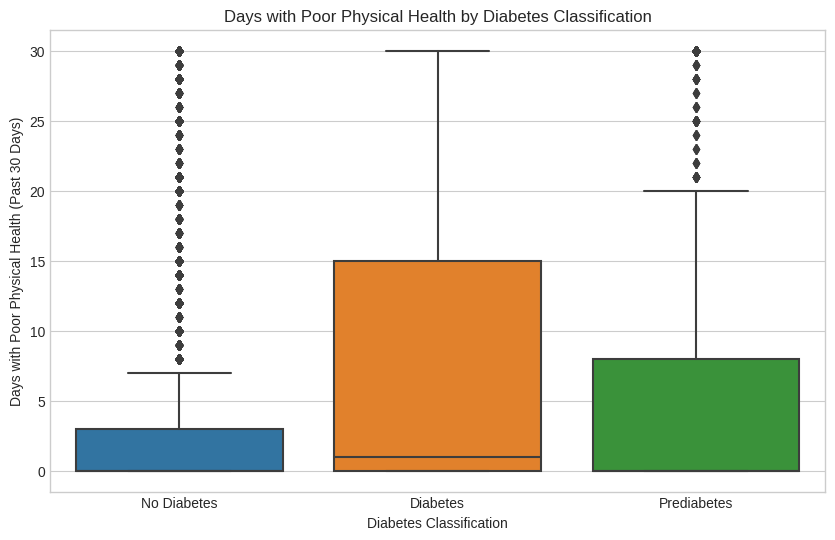

In [99]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='DiabetesClassification', y='PhysHlth')

# Set axis labels and title
plt.xlabel('Diabetes Classification')
plt.ylabel('Days with Poor Physical Health (Past 30 Days)')
plt.title('Days with Poor Physical Health by Diabetes Classification')

# Display the plot
plt.show()

- The median number of days with poor physical health is lower for the "No Diabetes" and "Prediabetes" categories.

- Diabetes and PreDiabetes are associated with a greater risk of experiencing poor physical health

### Mental Health

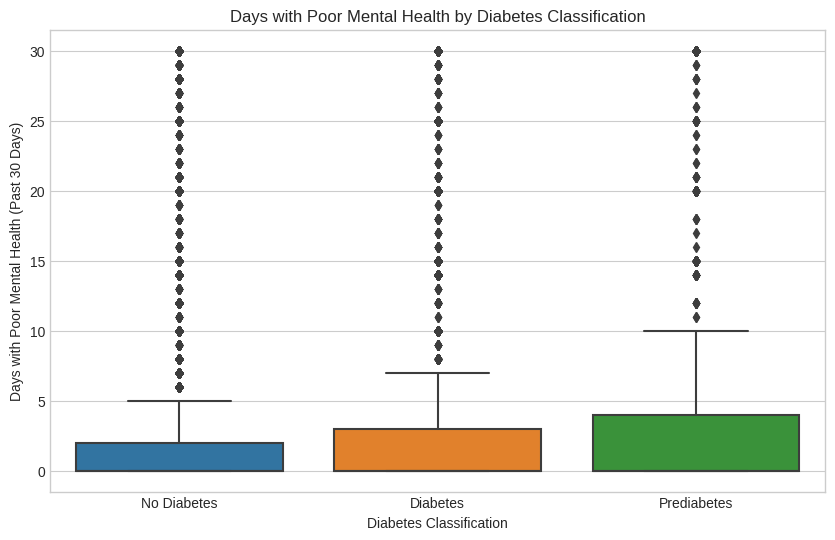

In [104]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='DiabetesClassification', y='MentHlth')

# Set axis labels and title
plt.xlabel('Diabetes Classification')
plt.ylabel('Days with Poor Mental Health (Past 30 Days)')
plt.title('Days with Poor Mental Health by Diabetes Classification')

# Display the plot
plt.show()

### Age


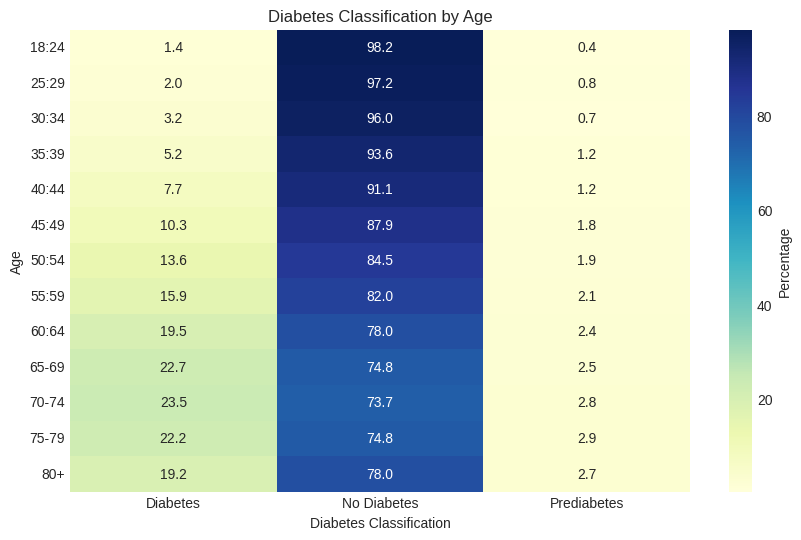

In [107]:
age = pd.cut(
    x=df['Age'], 
    bins=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
    labels=['18:24', '25:29', '30:34', '35:39', '40:44', '45:49', '50:54', '55:59', '60:64', "65-69", "70-74","75-79", "80+"] 
)

# Create a normalized crosstab
crosstab_normalized = pd.crosstab(age, df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Age index
crosstab_normalized = crosstab_normalized.reindex(['18:24', '25:29', '30:34', '35:39', '40:44', '45:49', '50:54', '55:59', '60:64', "65-69", "70-74","75-79", "80+"])

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('Age')
ax.set_title('Diabetes Classification by Age')

# Display the plot
plt.show()


- The percentage of individuals with Diabetes increases with age, with the highest prevalence observed in the 75-79 age group.

- Prediabetes also shows a trend of increasing prevalence with age, but the percentage of individuals with Prediabetes is lower compared to the percentage of individuals with Diabetes in each age group.

<b> Age is an important factor in determining the prevalence of Diabetes, with higher prevalence observed in older age groups. 

### Education

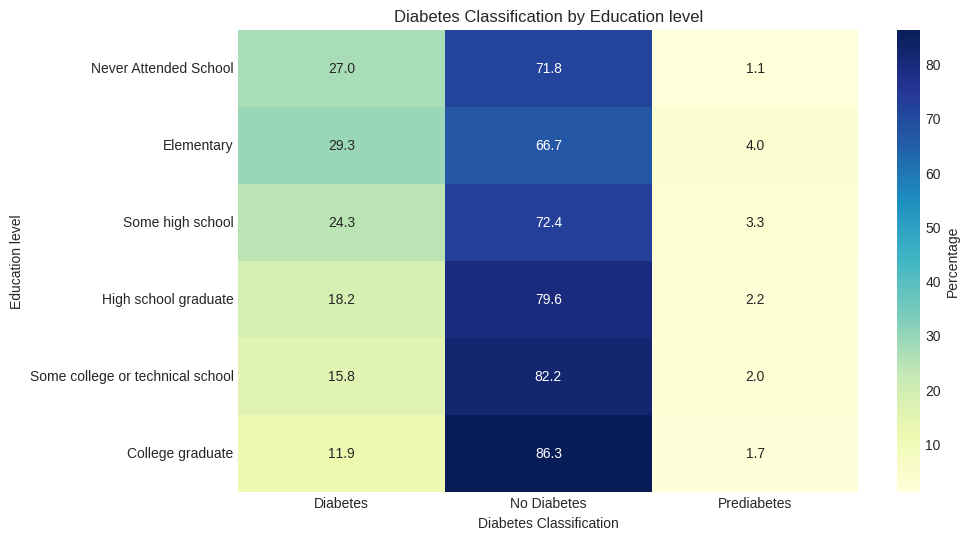

In [114]:
df_copy['Education'] = df['Education'].map({1: 'Never Attended School', 2: 'Elementary' , 3: 'Some high school', 4: 'High school graduate', 5: 'Some college or technical school', 6: 'College graduate'})


# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['Education'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Education index
crosstab_normalized = crosstab_normalized.reindex(['Never Attended School','Elementary' , 'Some high school','High school graduate',  'Some college or technical school','College graduate'])

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('Education level')
ax.set_title('Diabetes Classification by Education level')

# Display the plot
plt.show()


- The prevalence of Diabetes decreases as the level of education increases.
- The percentage of individuals with Diabetes is highest among those who never attended school and those who only completed elementary school.
- Among those without Diabetes, the percentage of individuals increases with level of education.
- The percentage of individuals with Prediabetes is relatively similar across education levels, but it is slightly higher for those who completed elementary school.


### Income

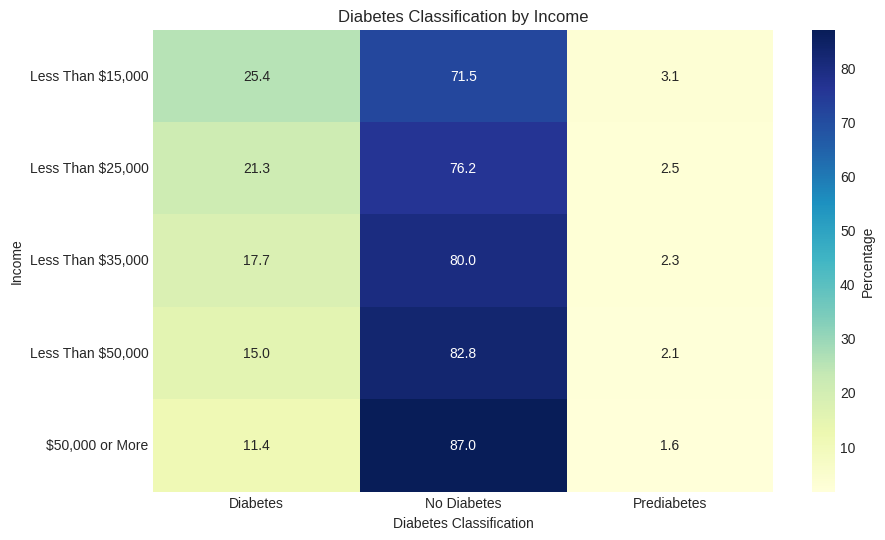

In [115]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['Income'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Income index
crosstab_normalized = crosstab_normalized.reindex(['Less Than $15,000','Less Than $25,000' , 'Less Than $35,000',  'Less Than $50,000', '$50,000 or More'])

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('Income')
ax.set_title('Diabetes Classification by Income')

# Display the plot
plt.show()


- The prevalence of Diabetes decreases as income increases.
- Prediabetes shows a similar trend to Diabetes, with higher prevalence observed in lower income groups.

### High Blood Presure



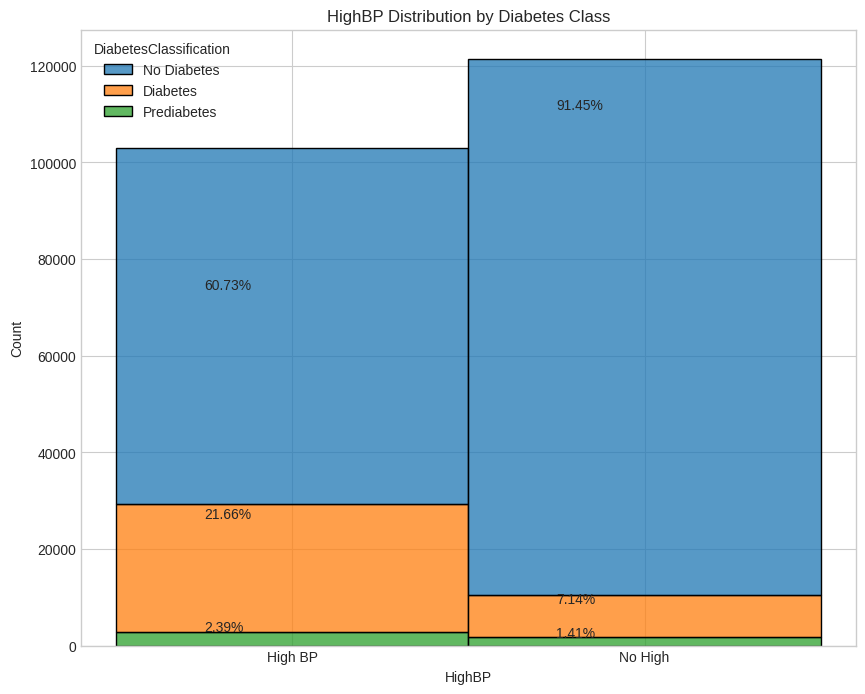

In [124]:
plt.figure(figsize=(10, 8))
# Create a histogram of HighBP, grouped by DiabetesClassification
x = sns.histplot(data=df_copy, x="HighBP", hue="DiabetesClassification", multiple="stack", bins=2)

# Set the chart title and axis labels
plt.title("HighBP Distribution by Diabetes Class")
plt.xlabel("HighBP")
plt.ylabel("Count")

# Calculate the total count of each HighBP group
highBP_counts = df_copy["HighBP"].value_counts()

for i in x.patches:
    highBP_value = int(i.get_x())
    group_total = highBP_counts[highBP_value]
    percentage = (i.get_height() / group_total) * 100
    x.annotate('{:.2f}%'.format(percentage), (i.get_x() + 0.25, i.get_height() + 0.01))

# Show the plot
plt.show()


- Individuals with high blood pressure have a much higher percentage of diabetes 
- Individuals with high blood pressure have a higher percentage of pre-diabetes compared to those without high blood pressure

### High Cholesterol

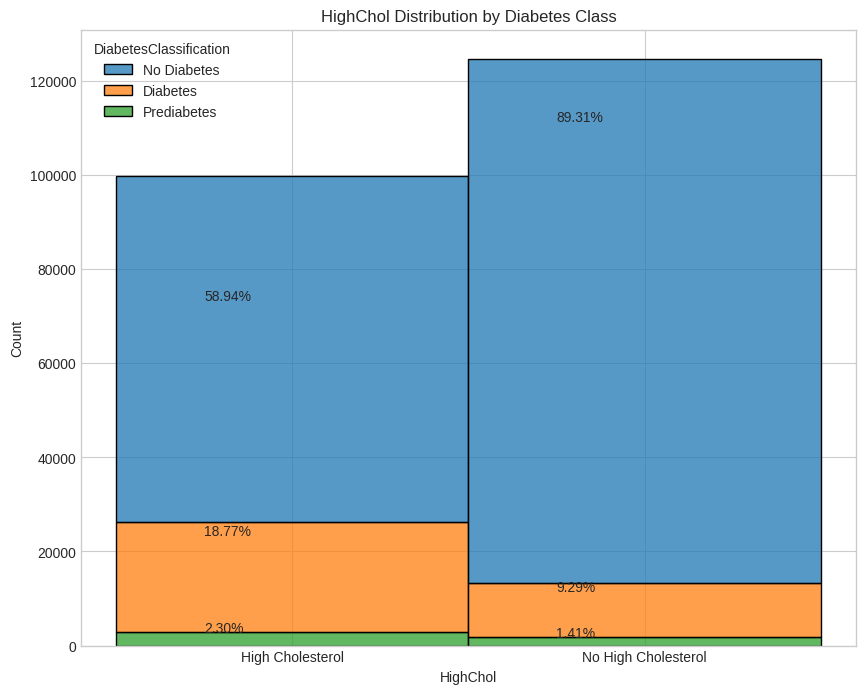

In [125]:
plt.figure(figsize=(10, 8))
# Create a histogram of HighChol, grouped by DiabetesClassification
x = sns.histplot(data=df_copy, x="HighChol", hue="DiabetesClassification", multiple="stack", bins=2)

# Set the chart title and axis labels
plt.title("HighChol Distribution by Diabetes Class")
plt.xlabel("HighChol")
plt.ylabel("Count")

# Calculate the total count of each HighChol group
highChol_counts = df_copy["HighChol"].value_counts()

for i in x.patches:
    highChol_value = int(i.get_x())
    group_total = highChol_counts[highChol_value]
    percentage = (i.get_height() / group_total) * 100
    x.annotate('{:.2f}%'.format(percentage), (i.get_x() + 0.25, i.get_height() + 0.01))

# Show the plot
plt.show()


- Individuals with high cholesterol are more likely to have diabetes or prediabetes, compared to those with normal cholesterol levels.

### Smokers


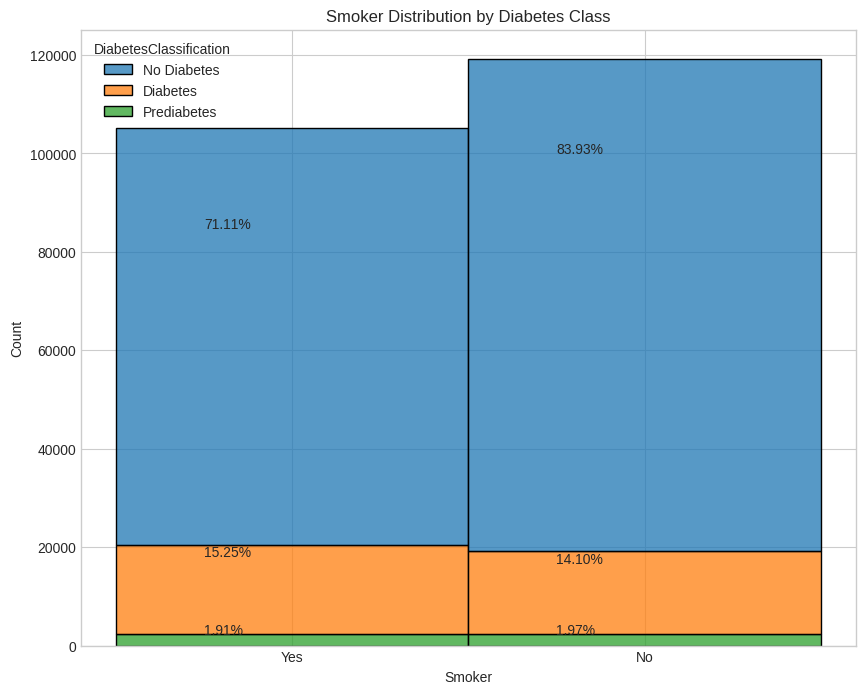

In [131]:
plt.figure(figsize=(10, 8))
# Create a histogram of Smoker, grouped by Diabetes Classification
x = sns.histplot(data=df_copy, x="Smoker", hue="DiabetesClassification", multiple="stack", bins=2)

# Set the chart title and axis labels
plt.title("Smoker Distribution by Diabetes Class")
plt.xlabel("Smoker")
plt.ylabel("Count")

smoker_counts = df_copy["Smoker"].value_counts()

for i in x.patches:
    smoker_value = int(i.get_x())
    group_total = smoker_counts[smoker_value]
    percentage = (i.get_height() / group_total) * 100
    x.annotate('{:.2f}%'.format(percentage), (i.get_x() + 0.25, i.get_height() + 0.01))

plt.show()

- Smokers have a slightly higher percentage of diabetes and prediabetes compared to non-smokers.

### Sex


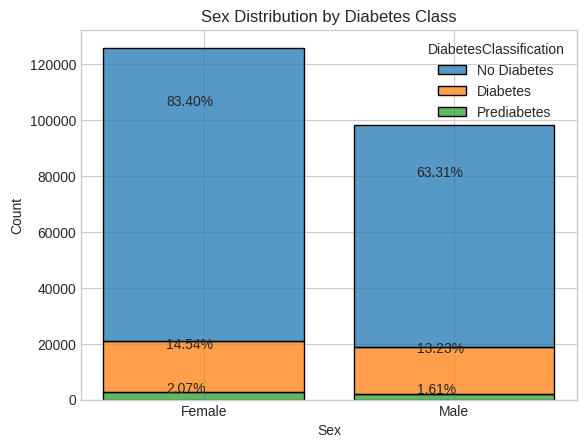

In [132]:
# Create a histogram of Sex, grouped by Diabetes Classification
x = sns.histplot(data=df_copy, x="Sex", hue="DiabetesClassification", multiple="stack", bins=2, shrink=0.8)

# Set the chart title and axis labels
plt.title("Sex Distribution by Diabetes Class")
plt.xlabel("Sex")
plt.ylabel("Count")

# Calculate the total count of each Sex group
sex_counts = df_copy["Sex"].value_counts()

for i in x.patches:
    sex_value = int(i.get_x())
    group_total = sex_counts[sex_value]
    percentage = (i.get_height() / group_total) * 100
    x.annotate('{:.2f}%'.format(percentage), (i.get_x() + 0.25, i.get_height() + 0.01))
# Show the plot
plt.show()

- The development of diabetes is not affected by gender.

### Cholesterol Check


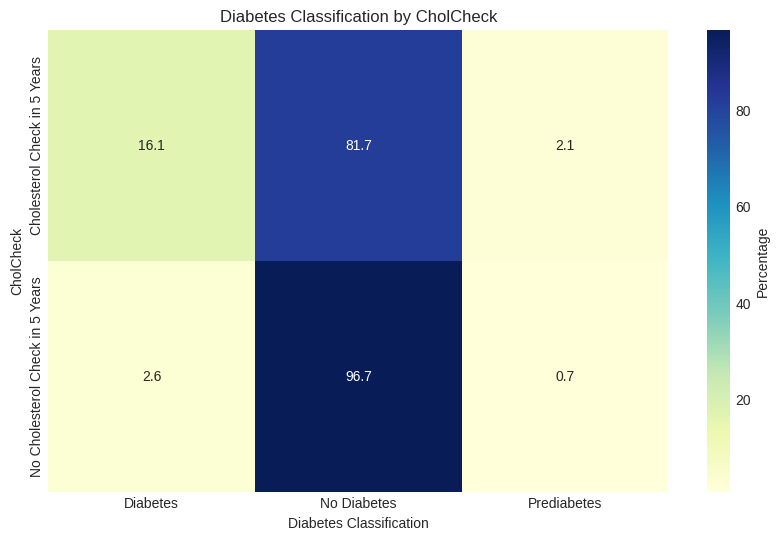

In [150]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['CholCheck'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the CholCheck index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('CholCheck')
ax.set_title('Diabetes Classification by CholCheck')

# Display the plot
plt.show()


- The prevalence of Diabetes is significantly higher among individuals who have not had a cholesterol check in the last 5 years compared to those who have.

- Prediabetes shows a similar trend to Diabetes, with higher prevalence observed among those who have not had a cholesterol check in the last 5 years.

### Stroke

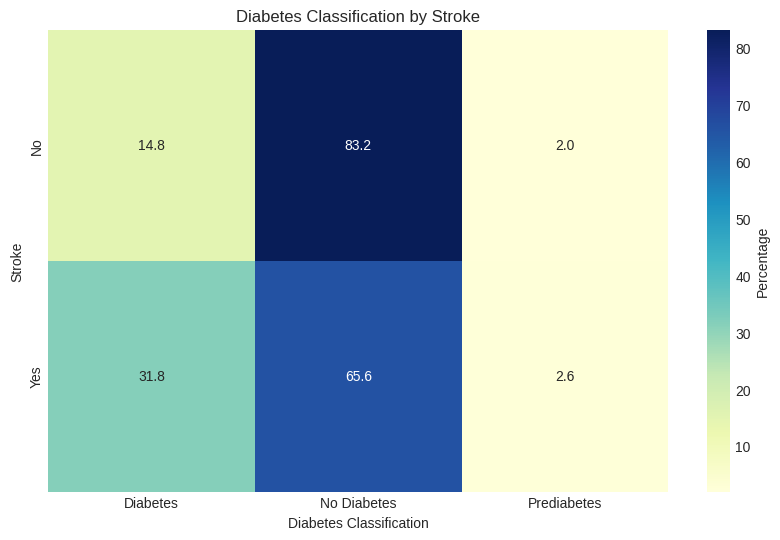

In [153]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['Stroke'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the CholCheck index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('Stroke')
ax.set_title('Diabetes Classification by Stroke')

# Display the plot
plt.show()


- The prevalence of Diabetes is higher among individuals who have had a stroke compared to those who have not.

- Prediabetes shows a similar trend to Diabetes, with higher prevalence observed among those who have had a stroke.

- <b> Individuals who have had a stroke may be at increased risk for developing Diabetes and Prediabetes.

### HeartDiseaseorAttack



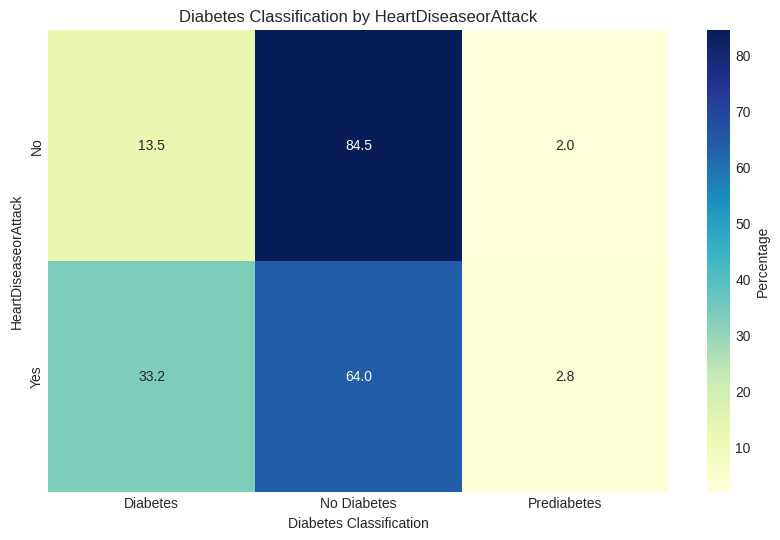

In [156]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['HeartDiseaseorAttack'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the HeartDiseaseorAttack index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('HeartDiseaseorAttack')
ax.set_title('Diabetes Classification by HeartDiseaseorAttack')

# Display the plot
plt.show()

- The prevalence of Diabetes is significantly higher among individuals who have had a heart disease or attack compared to those who have not.

- Prediabetes shows a similar trend to Diabetes, with higher prevalence observed among those who have had a heart disease or attack.
- <b> Individuals who have had a heart disease or attack may be at increased risk for developing Diabetes and Prediabetes.

### Physical Activity 



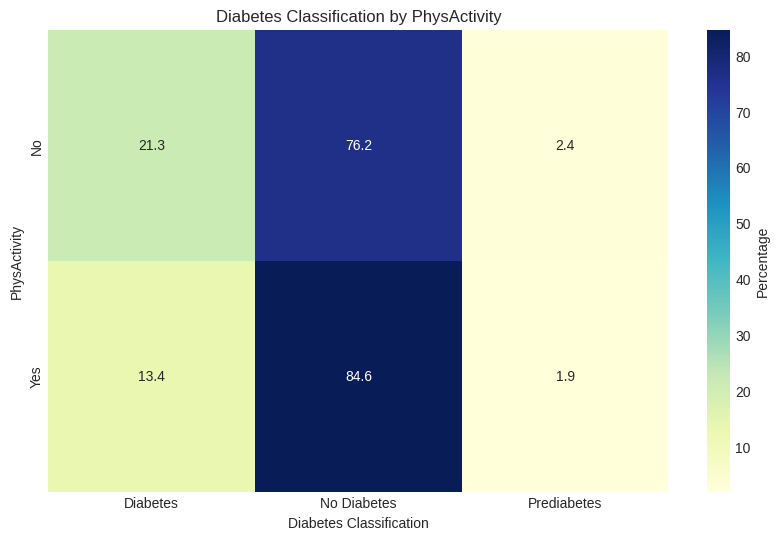

In [159]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['PhysActivity'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the PhysActivity index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('PhysActivity')
ax.set_title('Diabetes Classification by PhysActivity')

# Display the plot
plt.show()


- The prevalence of Diabetes is significantly higher among individuals who do not engage in physical activity compared to those who do.
- Prediabetes shows a similar trend to Diabetes, with higher prevalence observed among those who do not engage in physical activity.
- <b> Physical activity may be an important factor in the prevention and management of Diabetes and Prediabetes.

### Fruits


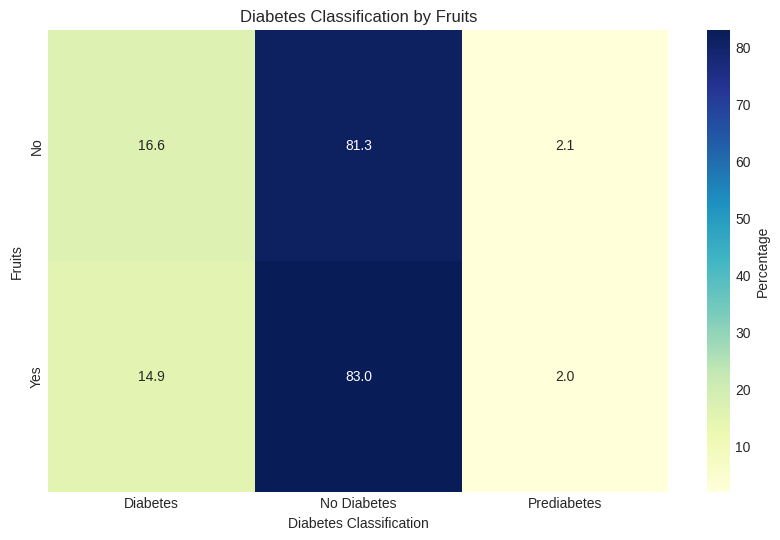

In [162]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['Fruits'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Fruits index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('Fruits')
ax.set_title('Diabetes Classification by Fruits')

# Display the plot
plt.show()


- There is a slightly lower prevalence of Diabetes among individuals who consume fruits one or more times per day compared to those who do not.

- Prediabetes shows a similar trend to Diabetes, with a slightly lower prevalence observed among those who consume fruits one or more times per day.

- <b> Consuming fruits may have a small beneficial effect on the prevention and management of Diabetes and Prediabetes.

### Veggies


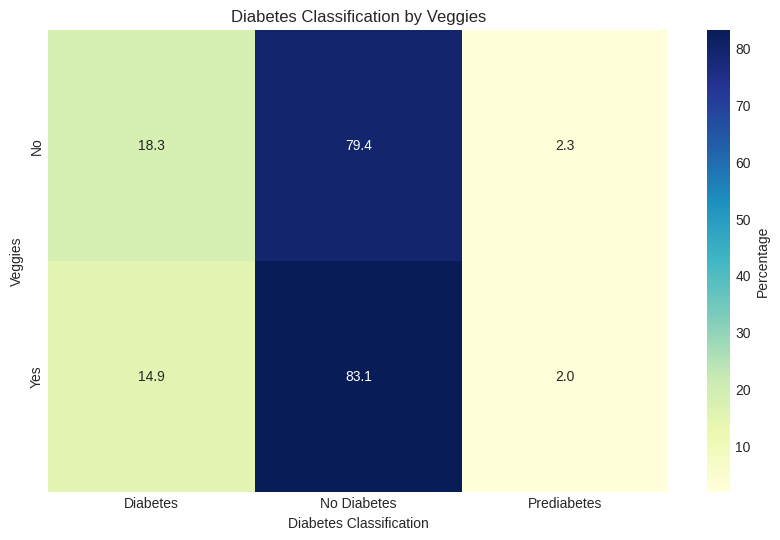

In [165]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['Veggies'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Veggies index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('Veggies')
ax.set_title('Diabetes Classification by Veggies')

# Display the plot
plt.show()


- There is a slightly lower prevalence of Diabetes among individuals who consume vegetables one or more times per day compared to those who do not.
- Prediabetes shows a similar trend to Diabetes, with a slightly lower prevalence observed among those who consume vegetables one or more times per day.
- <b> Consuming vegetables may have a small beneficial effect on the prevention and management of Diabetes and Prediabetes. 

### Heavy drinkers 


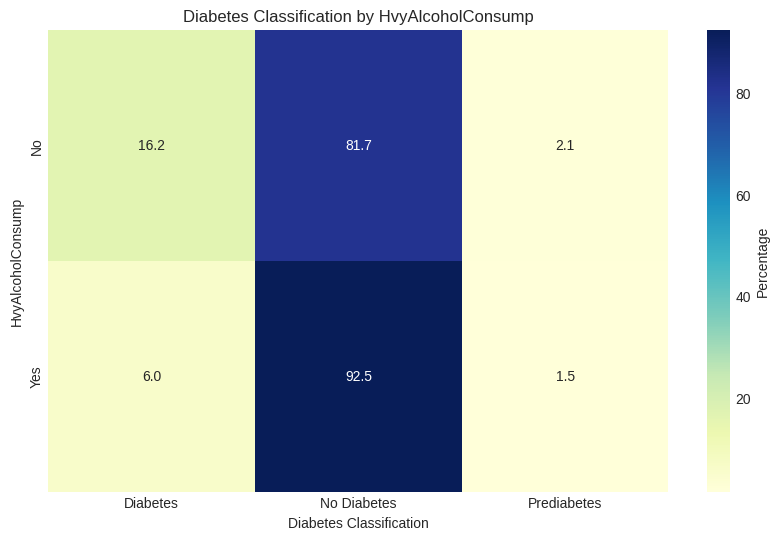

In [168]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['HvyAlcoholConsump'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Veggies index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('HvyAlcoholConsump')
ax.set_title('Diabetes Classification by HvyAlcoholConsump')

# Display the plot
plt.show()

-  Heavy alcohol consumption is surprisingly associated with a lower prevalence of diabetes

### Any Kind of Health Care


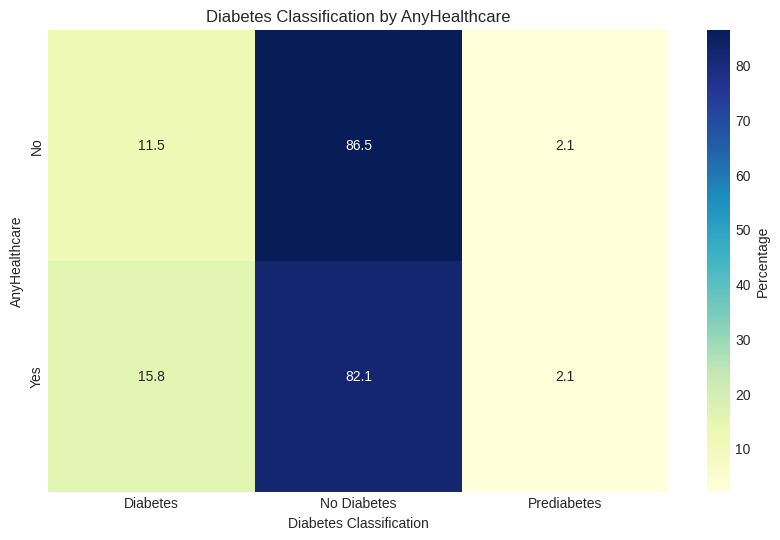

In [171]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['AnyHealthcare'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the Veggies index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('AnyHealthcare')
ax.set_title('Diabetes Classification by AnyHealthcare')

# Display the plot
plt.show()

- The prevalence of diabetes is higher in the "No" category for AnyHealthcare compared to the "Yes" category.

### No Doctor Because of Cost


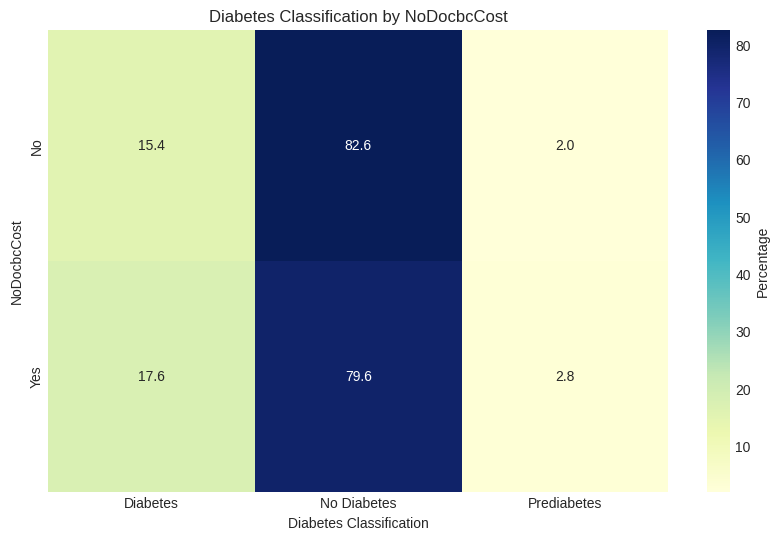

In [174]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['NoDocbcCost'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the NoDocbcCost index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('NoDocbcCost')
ax.set_title('Diabetes Classification by NoDocbcCost')

# Display the plot
plt.show()

- The prevalence of diabetes is higher among individuals who have reported not being able to see a doctor due to cost in the past 12 months.
- The prevalence of prediabetes is also slightly higher among individuals who have reported not being able to see a doctor due to cost.

### Serious Difficulty Walking


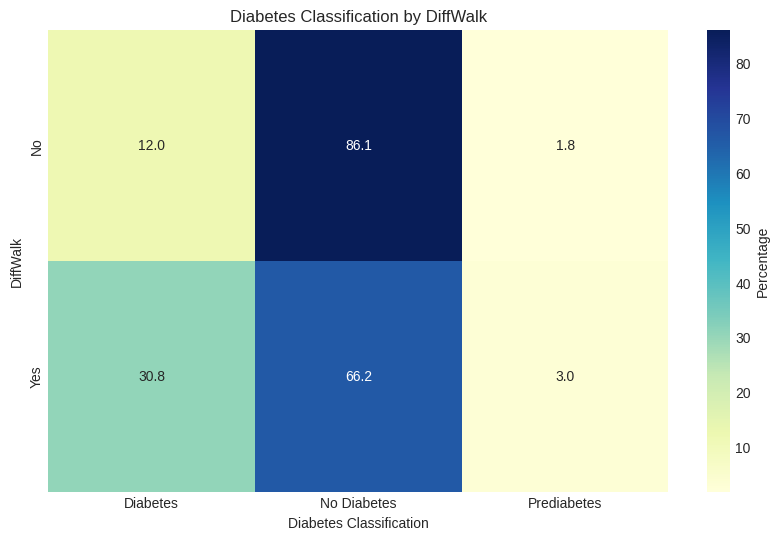

In [177]:
# Create a normalized crosstab
crosstab_normalized = pd.crosstab(df_copy['DiffWalk'], df_copy['DiabetesClassification'], normalize='index') * 100

# Reorder the DiffWalk index
crosstab_normalized = crosstab_normalized

# Create a heatmap using the normalized crosstab
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_normalized, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
ax.set_xlabel('Diabetes Classification')
ax.set_ylabel('DiffWalk')
ax.set_title('Diabetes Classification by DiffWalk')

# Display the plot
plt.show()

- There is a higher prevalence of diabetes among individuals who report having difficulty walking or climbing stairs

### Conclusion:
It seems that diabetes is more prevalent among individuals who are older, have lower income, have had a stroke or heart disease, are physically inactive, do not consume enough fruits and vegetables, and have not had a cholesterol check in the past 5 years. 



### Skewness
Skewness refers to the degree of asymmetry of a distribution.

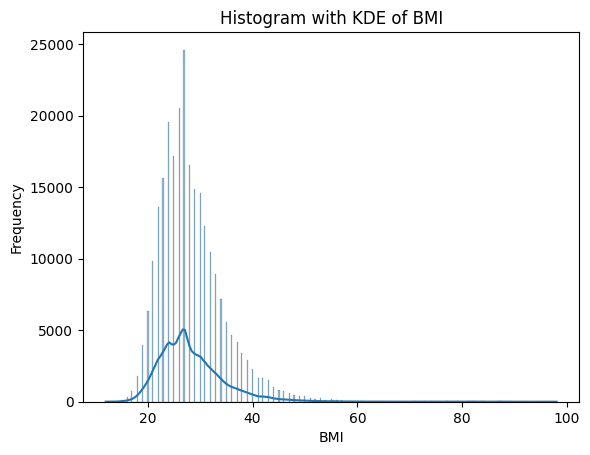

2.122003758291108


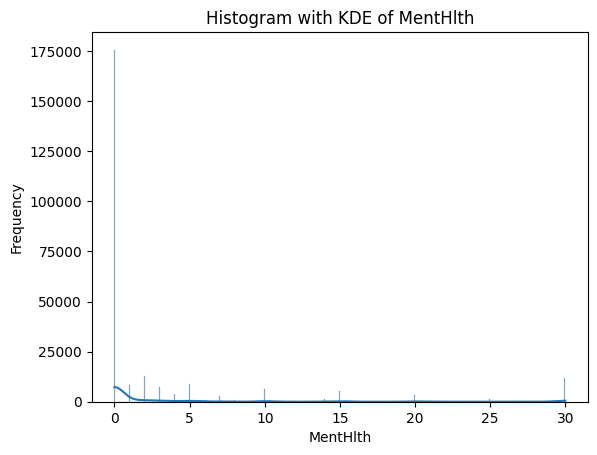

2.721148365662696


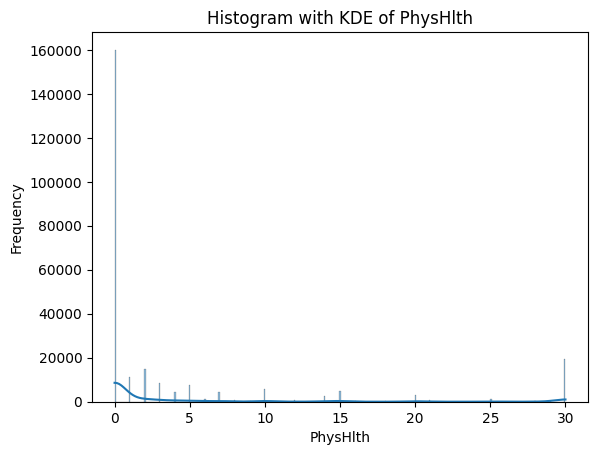

2.2073949151986723


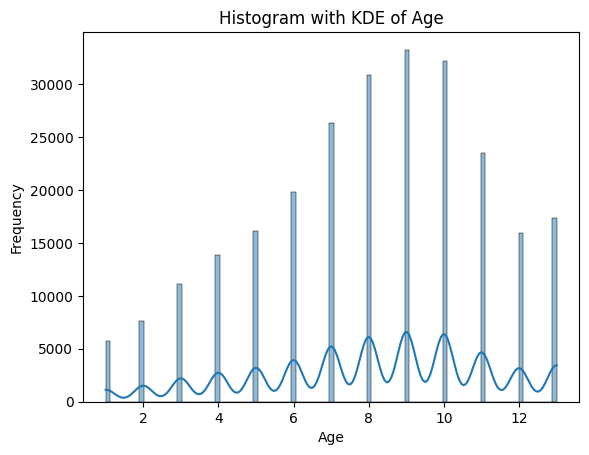

-0.35990324786631667


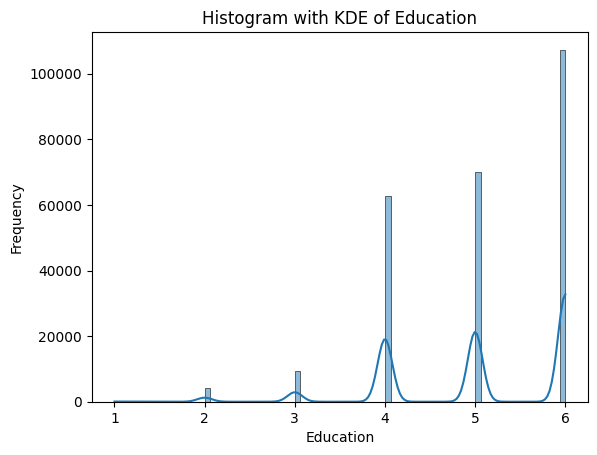

-0.7772552705520824


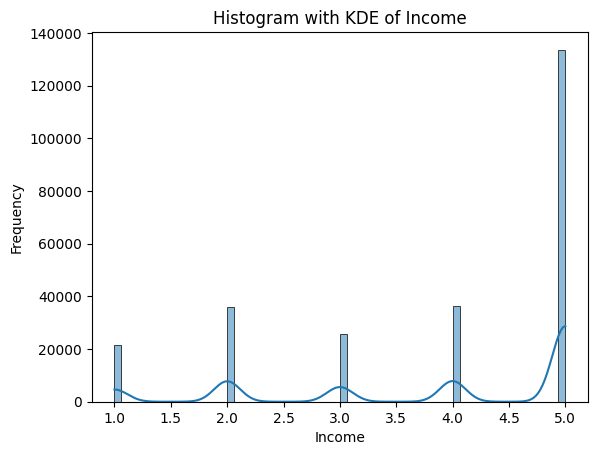

-0.8567672893206947


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns

# Load the dataset
data = pd.read_csv('data.csv')
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education','Income']

for feature in numeric_features:
    plt.figure()
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Histogram with KDE of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
    skewness = data[feature].skew()
    print(skewness)
   

### Outliers
Data outliers are observations that significantly differ from the other data points in a dataset.

Identify Outliers:
- Visualizion using boxplots
- Z-score -> Threashold the deviations from mean
- Interquartile range -> Range between first quartile (25th percentile) and the third quartile (75th percentile) 

BMI, GenHlth, MentHlth and PhysHlt seem to have outliers.

#### There is class imbalance in the dataset!

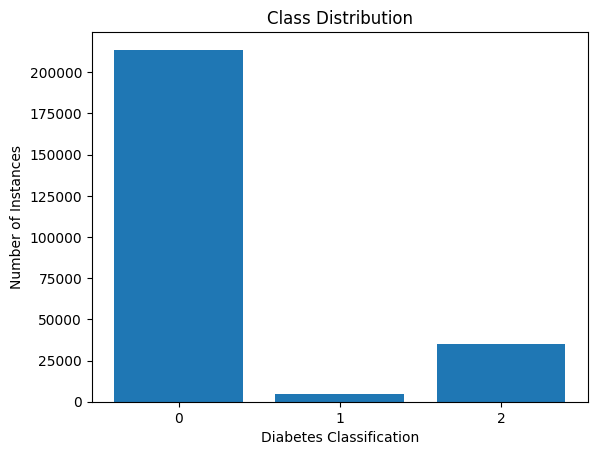

In [4]:
class_counts = data['DiabetesClassification'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Diabetes Classification')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks([0, 1, 2])
plt.show()

### Multicollinearity
Multicollinearity is the occurence of high intercorelations among two or more independent variables.
VIF is a measure of multicollinearity. 
- VIF=1 indicates no multicollinearity
- VIF>10 can be consider problematic

Multicollinearity is not an issue for our dataset and does not introduce bias

In [10]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

continuous_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

# VIF
X = data[continuous_columns]
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   Features       VIF
0       BMI  6.827322
1   GenHlth  8.459812
2  MentHlth  1.382364
3  PhysHlth  1.758876
